In [46]:
#GLOBAl SUPERSTORE SALES ANALYSIS

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Part 1 – Basic Data Understanding (Pandas)

Load the dataset and display the first 10 rows.
Show the shape, column names, and data types.
Check for missing values and duplicates.
Use .describe() for numeric columns.
Get the number of unique customers and products.
Find the country with the highest sales.

In [48]:
df=pd.read_excel('global_superstore_2016.xlsx')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.930,High
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,1.580,High
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,1.003,Medium


In [49]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
5,22732,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical
6,30570,IN-2012-TS2134092-41219,2012-11-06,2012-11-08,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,FUR-CH-5378,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical
7,31192,IN-2013-MB1808592-41378,2013-04-14,2013-04-18,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,FUR-TA-3764,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.4800,878.38,High
8,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.960,2,0.0,54.7136,25.27,High
9,36258,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,11.13,High


In [50]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(51290, 24)
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')
Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64

In [51]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2014-05-11 21:26:49.155780608,2014-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
min,1.00000,2012-01-01 00:00:00,2012-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,2013-06-19 00:00:00,2013-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2014-07-08 00:00:00,2014-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2015-05-22 00:00:00,2015-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2015-12-31 00:00:00,2016-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373


In [54]:
#to count the number of unique customers and products --> use nunique()
print(df['Customer ID'].nunique())
print(df['Product ID'].nunique())

17415
3788


In [55]:
df.loc[df['Sales']==df['Sales'].max(),'Country'].tolist()

['United States']

Part 2 – EDA (Exploratory Data Analysis)

Histogram of sales amounts.
Top 10 products by sales.
Top 10 products by profit.
Scatter plot: Sales vs Profit.
Bar chart showing total sales per region.
Boxplot of profit grouped by product category.
Yearly sales trend (line chart).

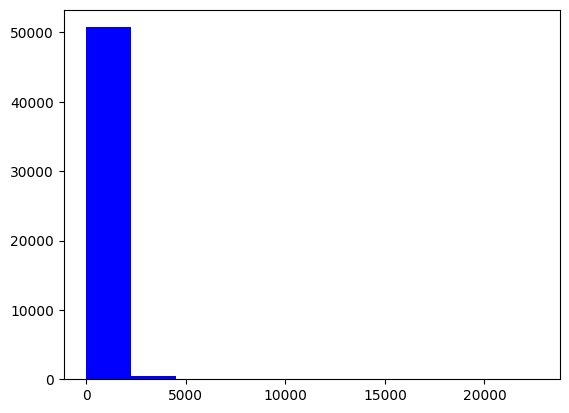

In [56]:
plt.hist(df['Sales'],bins=10,color='blue')
plt.show()

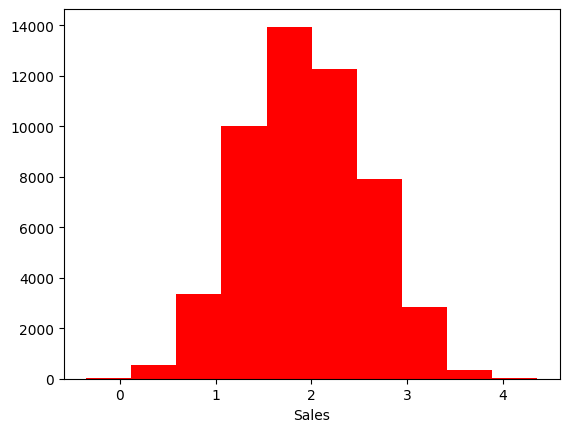

In [57]:
log_sales=np.log10(df['Sales'])
plt.hist(log_sales,bins=10,color='red')
plt.xlabel('Sales')
plt.show()

In [58]:
df.sort_values('Sales',ascending=False).head(10)['Product Name'].reset_index(drop=True)

0    Cisco TelePresence System EX90 Videoconferenci...
1                Canon imageCLASS 2200 Advanced Copier
2                Canon imageCLASS 2200 Advanced Copier
3                Canon imageCLASS 2200 Advanced Copier
4                Canon imageCLASS 2200 Advanced Copier
5     GBC Ibimaster 500 Manual ProClick Binding System
6                 Ibico EPK-21 Electric Binding System
7     3D Systems Cube Printer, 2nd Generation, Magenta
8    HP Designjet T520 Inkjet Large Format Printer ...
9                Canon imageCLASS 2200 Advanced Copier
Name: Product Name, dtype: object

In [59]:
df.sort_values('Profit',ascending=False).head(10)['Product Name'].reset_index(drop=True)

0                Canon imageCLASS 2200 Advanced Copier
1                Canon imageCLASS 2200 Advanced Copier
2                Canon imageCLASS 2200 Advanced Copier
3     GBC Ibimaster 500 Manual ProClick Binding System
4                 Ibico EPK-21 Electric Binding System
5                                    Hoover Stove, Red
6                Canon imageCLASS 2200 Advanced Copier
7    Fellowes PB500 Electric Punch Plastic Comb Bin...
8                            Samsung Smart Phone, VoIP
9                    Apple Smart Phone, with Caller ID
Name: Product Name, dtype: object

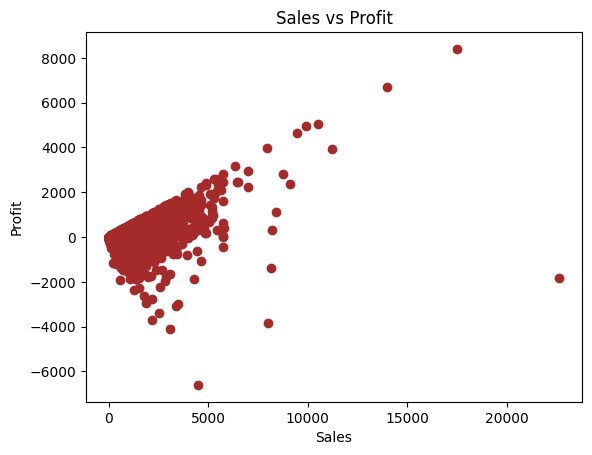

In [60]:
plt.scatter(df['Sales'],df['Profit'],color='brown')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.show()

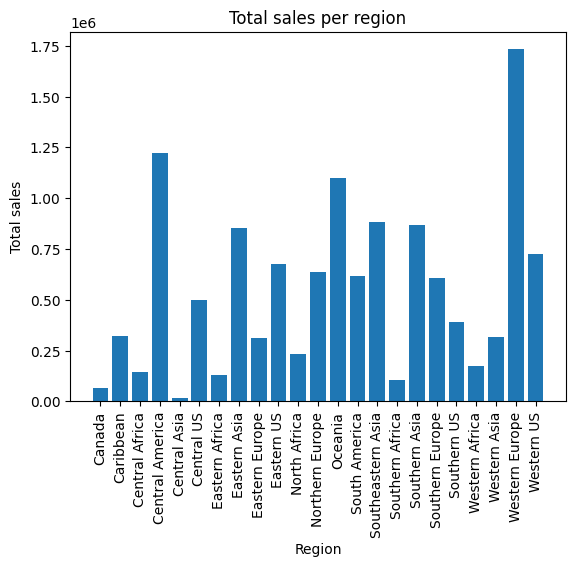

In [61]:
tot_sales=df.groupby('Region')['Sales'].sum()
plt.bar(tot_sales.index,tot_sales.values)
plt.xlabel('Region')
plt.ylabel('Total sales')
plt.title('Total sales per region')
plt.xticks(rotation=90)
plt.show()

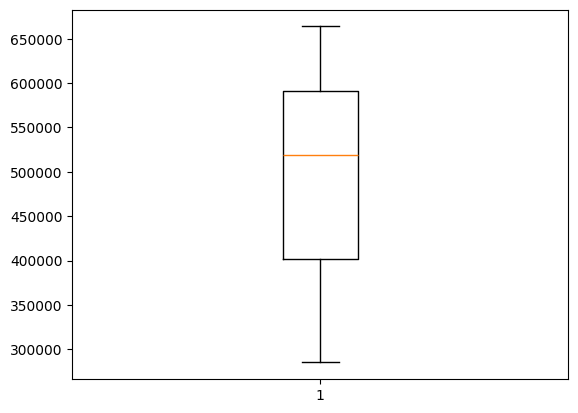

In [62]:
group_profit=df.groupby('Category')['Profit'].sum()
plt.boxplot(group_profit.values)
plt.show()

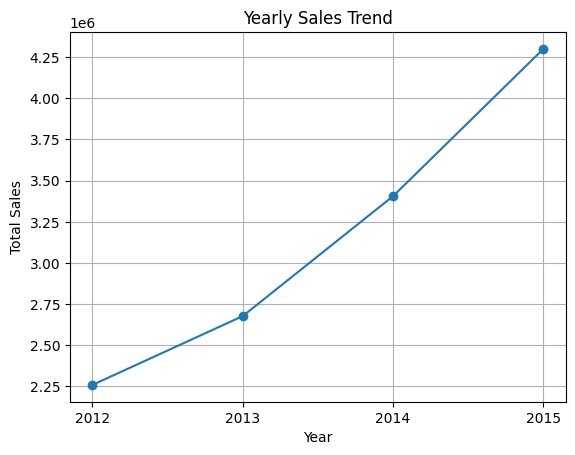

In [63]:
df['order_year']=df['Order Date'].astype(str).str.split('-').str[0]
yearly_sales=df.groupby('order_year')['Sales'].sum()
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Part 3 – Statistics

Calculate mean, median, and mode of sales.
Find variance and standard deviation of profit.
Correlation between discount and profit.
Probability: Random order has discount > 0.3.
Probability: Order is from "United States".
Percentage of orders with negative profit.

In [64]:
print('Mean: ',df['Sales'].mean())
print('Median: ',df['Sales'].median())
print('Mode: ',df['Sales'].mode().iloc[0])

Mean:  246.4905812025736
Median:  85.053
Mode:  12.96


In [65]:
print('Variance: ',df['Profit'].var())
print('Standard deviation: ',df['Profit'].std())

Variance:  30394.77448304805
Standard deviation:  174.34097190003288


In [66]:
df['Discount'].corr(df['Profit'])

np.float64(-0.3164901718272709)

In [67]:
numerator=df[df['Discount']>0.3]['Order ID'].nunique()
denominator=df['Order ID'].nunique()
probability=numerator/denominator
probability

0.22932213930348258

In [68]:
numerator=(df['Country']=='United States').sum()
denominator=len(df['Country'])
probability=numerator/denominator
probability


np.float64(0.19485279781633846)

In [69]:
numerator=(df['Profit']<0).sum()
denominator=len(df['Profit'])
percentage=(numerator/denominator)*100
percentage


np.float64(24.457009163579645)

Part 4 – Linear Algebra & NumPy

Create NumPy arrays for sales and profit.
Perform vector addition and subtraction.
Compute the dot product between these arrays.
Create a matrix [Sales, Profit] and multiply with weights [0.6, 0.4].
Normalize the sales array.

In [70]:
array_sales=np.array(df['Sales'])
array_profit=np.array(df['Profit'])
print(array_sales)
print(array_profit)

[ 221.98  3709.395 5175.171 ...    8.56    13.44    61.38 ]
[  62.1544 -288.765   919.971  ...    2.4824    2.4       1.8   ]


In [71]:
print(np.add(array_sales,array_profit))
print(np.subtract(array_sales,array_profit))
print(np.dot(array_sales,array_profit))

[ 284.1344 3420.63   6095.142  ...   11.0424   15.84     63.18  ]
[ 159.8256 3998.16   4255.2    ...    6.0776   11.04     59.58  ]
2475811564.867057


In [72]:
matrix=np.array(df[['Sales','Profit']])
weights=np.array([0.6,0.4])
np.dot(matrix,weights)

array([ 158.04976, 2110.131  , 3473.091  , ...,    6.12896,    9.024  ,
         37.548  ], shape=(51290,))

In [73]:
min=array_sales.min()
max=array_sales.max()
normalisation=(array_sales-min)/(max-min)
normalisation

array([0.00978601, 0.16383714, 0.22858551, ..., 0.00035851, 0.00057408,
       0.00269175], shape=(51290,))

Part 5 – Calculus

Assume:
 Profitability_Index = (Profit×100) / Sales
 Find derivative wrt Profit.

In [74]:
import sympy as sp
profit,sales=sp.symbols('profit sales')
probability_index=(profit*100)/sales
diff=sp.diff(probability_index,profit)
diff

100/sales

Part 6 – Feature Engineering

Create profit_margin = (Profit / Sales) × 100.
Create is_high_discount = 1 if Discount > 0.3 else 0.
Create is_profitable = 1 if Profit > 0 else 0.
Create quartiles based on Sales.
Create order_year from Order Date.


In [75]:
df['profit_margin']=(df['Profit']/df['Sales'])*100
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,order_year,profit_margin
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High,2014,28.000000
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical,2014,-7.784693
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium,2014,17.776630
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium,2014,-3.337586
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical,2014,10.996272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,1.010,Medium,2015,6.912442
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.930,High,2014,20.000000
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,Art,Newell 341,8.560,2,0.0,2.4824,1.580,High,2012,29.000000
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,1.003,Medium,2013,17.857143


In [76]:
df['is_high_discount']=df['Discount'].apply(lambda x: 1 if x>0.3 else 0).astype(int)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,order_year,profit_margin,is_high_discount
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High,2014,28.000000,0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical,2014,-7.784693,0
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium,2014,17.776630,0
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium,2014,-3.337586,0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical,2014,10.996272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,1.010,Medium,2015,6.912442,0
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.930,High,2014,20.000000,0
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,Newell 341,8.560,2,0.0,2.4824,1.580,High,2012,29.000000,0
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,1.003,Medium,2013,17.857143,0


In [78]:
df['is_profitable']=df['Profit'].apply(lambda x: 1 if x>0 else 0).astype(int)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,order_year,profit_margin,is_high_discount,is_profitable
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,221.980,2,0.0,62.1544,40.770,High,2014,28.000000,0,1
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,3709.395,9,0.1,-288.7650,923.630,Critical,2014,-7.784693,0,0
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,5175.171,9,0.1,919.9710,915.490,Medium,2014,17.776630,0,1
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,2892.510,5,0.1,-96.5400,910.160,Medium,2014,-3.337586,0,0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,2832.960,8,0.0,311.5200,903.040,Critical,2014,10.996272,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,65.100,5,0.0,4.5000,1.010,Medium,2015,6.912442,0,1
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,16.720,5,0.2,3.3440,1.930,High,2014,20.000000,0,1
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,8.560,2,0.0,2.4824,1.580,High,2012,29.000000,0,1
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,13.440,2,0.0,2.4000,1.003,Medium,2013,17.857143,0,1


In [ ]:
df['Sales_quartile']=pd.qcut(df['Sales'],q=4,labels=False)
df['Sales_quartile']

0        2
1        3
2        3
3        3
4        3
        ..
51285    1
51286    0
51287    0
51288    0
51289    1
Name: Sales_quartile, Length: 51290, dtype: int64

In [ ]:
df['order_year']=df['Order Date'].astype(str).str.split('-').str[0]
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,profit_margin,is_high_discount,is_profitable,Sales_quartile,order_year
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.0,62.1544,40.770,High,28.000000,0,1,2,2014
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.1,-288.7650,923.630,Critical,-7.784693,0,0,3,2014
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.1,919.9710,915.490,Medium,17.776630,0,1,3,2014
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,5,0.1,-96.5400,910.160,Medium,-3.337586,0,0,3,2014
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.0,311.5200,903.040,Critical,10.996272,0,1,3,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,5,0.0,4.5000,1.010,Medium,6.912442,0,1,1,2015
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,5,0.2,3.3440,1.930,High,20.000000,0,1,0,2014
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,2,0.0,2.4824,1.580,High,29.000000,0,1,0,2012
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,2,0.0,2.4000,1.003,Medium,17.857143,0,1,0,2013


Part 7 – SQL Simulation in Pandas

Select all orders with profit > 100 and discount < 0.2.
Group by region and calculate total sales.
Get the top 5 most profitable countries.
Select all orders from 2015 with negative profit.
Get top 10 highest sales orders from Corporate segment.
Count orders in each shipping mode category.

In [ ]:
df[(df['Profit']>100) & (df['Discount']<0.2)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,profit_margin,is_high_discount,is_profitable,Sales_quartile,order_year
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.1,919.9710,915.49,Medium,17.776630,0,1,3,2014
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.0,311.5200,903.04,Critical,10.996272,0,1,3,2014
5,22732,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,5,0.1,763.2750,897.35,Critical,26.662999,0,1,3,2014
6,30570,IN-2012-TS2134092-41219,2012-11-06,2012-11-08,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,4,0.0,564.8400,894.77,Critical,30.999737,0,1,3,2012
7,31192,IN-2013-MB1808592-41378,2013-04-14,2013-04-18,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,6,0.0,996.4800,878.38,High,18.999245,0,1,3,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51138,36507,CA-2013-YS21880140-41285,2013-01-11,2013-01-17,Standard Class,YS-218801406,Yana Sorensen,Corporate,19711.0,Newark,...,3,0.0,120.9468,29.63,Medium,26.000000,0,1,3,2013
51151,34367,CA-2012-YC21895140-41229,2012-11-16,2012-11-21,Standard Class,YC-218951406,Yoseph Carroll,Corporate,19711.0,Newark,...,7,0.0,792.2691,428.80,High,27.000000,0,1,3,2012
51192,32107,CA-2012-ZC21910140-41194,2012-10-12,2012-10-14,First Class,ZC-219101404,Zuschuss Carroll,Consumer,98026.0,Edmonds,...,5,0.0,311.6520,146.92,High,24.000000,0,1,3,2012
51193,36485,CA-2013-ZC21910140-41530,2013-09-13,2013-09-18,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,47201.0,Columbus,...,7,0.0,394.2120,132.78,Medium,26.000000,0,1,3,2013


In [ ]:
df.groupby('Region')['Sales'].sum()

Region
Canada               6.692817e+04
Caribbean            3.242809e+05
Central Africa       1.436300e+05
Central America      1.223101e+06
Central Asia         1.931146e+04
Central US           5.012399e+05
Eastern Africa       1.278560e+05
Eastern Asia         8.550594e+05
Eastern Europe       3.100334e+05
Eastern US           6.787812e+05
North Africa         2.332166e+05
Northern Europe      6.367792e+05
Oceania              1.100185e+06
South America        6.172237e+05
Southeastern Asia    8.844232e+05
Southern Africa      1.051918e+05
Southern Asia        8.665727e+05
Southern Europe      6.085940e+05
Southern US          3.917219e+05
Western Africa       1.738788e+05
Western Asia         3.171070e+05
Western Europe       1.731930e+06
Western US           7.254578e+05
Name: Sales, dtype: float64

In [ ]:
df.groupby('Country')['Profit'].sum().sort_values(ascending=False).head(5).index.tolist()

['United States', 'China', 'India', 'United Kingdom', 'France']

In [ ]:
df[(df['order_year']=='2015') & (df['Profit']<0)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,profit_margin,is_high_discount,is_profitable,Sales_quartile,order_year
65,32637,CA-2015-AS10045140-42007,2015-01-03,2015-01-05,First Class,AS-100451408,Aaron Smayling,Corporate,28540.0,Jacksonville,...,2,0.50,-27.8280,160.19,High,-4.000000,1,0,3,2015
73,21209,IN-2015-LA1678059-42242,2015-08-26,2015-08-27,First Class,LA-1678059,Laura Armstrong,Corporate,NaN,Palembang,...,7,0.47,-452.8104,586.57,High,-13.212449,1,0,3,2015
76,33130,CA-2015-AS10045140-42218,2015-08-02,2015-08-08,Standard Class,AS-100451402,Aaron Smayling,Corporate,78745.0,Austin,...,3,0.40,-263.9967,103.62,Medium,-18.333333,1,0,3,2015
83,40425,US-2015-AS10045140-42252,2015-09-05,2015-09-06,First Class,AS-100451404,Aaron Smayling,Corporate,97756.0,Redmond,...,7,0.70,-58.7160,23.88,High,-66.666667,1,0,2,2015
91,34336,CA-2015-AS10045140-42281,2015-10-04,2015-10-09,Standard Class,AS-100451404,Aaron Smayling,Corporate,91104.0,Pasadena,...,3,0.20,-6.4233,12.65,Medium,-3.750000,0,0,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51252,40220,CA-2015-ZC21910140-42167,2015-06-12,2015-06-18,Standard Class,ZC-219101408,Zuschuss Carroll,Consumer,28601.0,Hickory,...,4,0.70,-3.8100,1.28,Medium,-83.333333,1,0,0,2015
51256,29192,ID-2015-JE1561097-42193,2015-07-08,2015-07-13,Standard Class,JE-1561097,Jim Epp,Corporate,NaN,Lahore,...,2,0.50,-13.2600,1.04,Medium,-72.222222,1,0,0,2015
51257,35397,US-2015-ZC21910140-42175,2015-06-20,2015-06-24,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,77095.0,Houston,...,1,0.80,-5.2072,1.07,Medium,-230.000000,1,0,0,2015
51260,35398,US-2015-ZC21910140-42175,2015-06-20,2015-06-24,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,77095.0,Houston,...,1,0.80,-1.1100,1.01,Medium,-250.000000,1,0,0,2015


In [ ]:
df[(df['Segment']=='Corporate')].sort_values('Sales',ascending=False).head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,profit_margin,is_high_discount,is_profitable,Sales_quartile,order_year
49003,38123,CA-2014-TC20980140-41915,2014-10-03,2014-10-10,Standard Class,TC-209801402,Tamara Chand,Corporate,47905.0,Lafayette,...,5,0.0,8399.9760,349.07,Medium,48.000000,0,1,3,2014
6422,35574,US-2014-BS11365140-41746,2014-04-17,2014-04-21,Standard Class,BS-113651406,Bill Shonely,Corporate,8701.0,Lakewood,...,7,0.0,2365.9818,516.91,Medium,26.000000,0,1,3,2014
23110,31980,US-2015-GT14635140-42313,2015-11-05,2015-11-05,Same Day,GT-146351408,Grant Thornton,Corporate,27217.0,Burlington,...,4,0.5,-3839.9904,674.82,High,-48.000000,1,0,3,2015
17,12069,ES-2015-PJ1883564-42255,2015-09-08,2015-09-14,Standard Class,PJ-1883564,Patrick Jones,Corporate,NaN,Prato,...,14,0.0,3979.0800,778.32,Low,49.997361,0,1,3,2015
215,27720,ID-2012-CA1196566-40949,2012-02-10,2012-02-15,Standard Class,CA-1196566,Carol Adams,Corporate,NaN,Fuji,...,11,0.0,2939.3100,413.80,Medium,41.998303,0,1,3,2012
11246,13560,ES-2012-ER13855120-41159,2012-09-07,2012-09-10,Second Class,ER-13855120,Elpida Rittenbach,Corporate,NaN,Lugo,...,12,0.0,2476.4400,28.74,Critical,37.999227,0,1,3,2012
4605,19688,IT-2014-ML17395120-41794,2014-06-04,2014-06-07,Second Class,ML-17395120,Marina Lichtenstein,Corporate,NaN,Valladolid,...,10,0.1,-445.4400,71.46,Critical,-7.779035,0,0,3,2014
42,25795,IN-2015-VG2180558-42273,2015-09-26,2015-09-28,Second Class,VG-2180558,Vivek Grady,Corporate,NaN,Thiruvananthapuram,...,13,0.0,2097.0300,658.35,Medium,36.998555,0,1,3,2015
81,50788,MO-2015-DP310586-42305,2015-10-28,2015-10-30,Second Class,DP-310586,Dave Poirier,Corporate,NaN,Meknes,...,14,0.0,2597.2800,568.45,Medium,48.993820,0,1,3,2015
49895,37637,CA-2015-TS21370140-42283,2015-10-06,2015-10-10,Standard Class,TS-213701406,Todd Sumrall,Corporate,10035.0,New York City,...,4,0.0,1351.9896,212.76,Medium,26.000000,0,1,3,2015


In [ ]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

Part 8 – Insights

Which country generates the most sales?
Which product category has the highest average profit margin?
Are high discounts always associated with low profits?
Which region contributes most to sales?
Do large orders tend to be more profitable?
Which year had the highest sales?
What percentage of orders result in a loss?

In [ ]:
sum=df.groupby('Country')['Sales'].sum()
max=sum.max()
sum[sum==max].index.tolist()

['United States']

In [ ]:
df.groupby('Category')['Profit'].mean().idxmax()

'Technology'

In [ ]:
low_profit=df['Profit'].min()
high_discount=df['Discount'].max()
correlation=df[(df['Profit']==low_profit) | (df['Discount']==high_discount)]
correlation['Profit'].corr(correlation['Discount'])

np.float64(0.9912163903879498)

In [ ]:
df.groupby('Region')['Sales'].sum().idxmax()

'Western Europe'

In [ ]:
df['Sales'].corr(df['Profit'])

np.float64(0.48491811261944445)

In [ ]:
df.groupby('order_year')['Sales'].sum().idxmax()

'2015'

In [ ]:
numerator=df[df['Profit']<0].shape[0]
denominator=df.shape[0]
percentage=(numerator/denominator)*100
percentage

24.457009163579645

EXTRA ANALYSIS

In [83]:
df['revenue_after_discount']=df['Sales']-(df['Sales']*df['Discount'])
df['profit_margin_after_discount']=(df['Profit']/df['revenue_after_discount']*100).round(2)
df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Shipping Cost,Order Priority,order_year,profit_margin,is_high_discount,is_profitable,loss,is_loss_order,revenue_after_discount,profit_margin_after_discount
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,40.770,High,2014,28.000000,0,1,0.000,0,221.9800,28.00
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,923.630,Critical,2014,-7.784693,0,0,288.765,1,3338.4555,-8.65
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,915.490,Medium,2014,17.776630,0,1,0.000,0,4657.6539,19.75
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,910.160,Medium,2014,-3.337586,0,0,96.540,1,2603.2590,-3.71
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,903.040,Critical,2014,10.996272,0,1,0.000,0,2832.9600,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,1.010,Medium,2015,6.912442,0,1,0.000,0,65.1000,6.91
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,1.930,High,2014,20.000000,0,1,0.000,0,13.3760,25.00
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,1.580,High,2012,29.000000,0,1,0.000,0,8.5600,29.00
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,1.003,Medium,2013,17.857143,0,1,0.000,0,13.4400,17.86


In [82]:
df['loss']=df['Profit'].apply(lambda x: abs(x) if x<0 else 0)
df['is_loss_order']=(df['loss']>0).astype(int)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Discount,Profit,Shipping Cost,Order Priority,order_year,profit_margin,is_high_discount,is_profitable,loss,is_loss_order
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.0,62.1544,40.770,High,2014,28.000000,0,1,0.000,0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.1,-288.7650,923.630,Critical,2014,-7.784693,0,0,288.765,1
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,0.1,919.9710,915.490,Medium,2014,17.776630,0,1,0.000,0
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,0.1,-96.5400,910.160,Medium,2014,-3.337586,0,0,96.540,1
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,0.0,311.5200,903.040,Critical,2014,10.996272,0,1,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,0.0,4.5000,1.010,Medium,2015,6.912442,0,1,0.000,0
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,0.2,3.3440,1.930,High,2014,20.000000,0,1,0.000,0
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,0.0,2.4824,1.580,High,2012,29.000000,0,1,0.000,0
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,0.0,2.4000,1.003,Medium,2013,17.857143,0,1,0.000,0


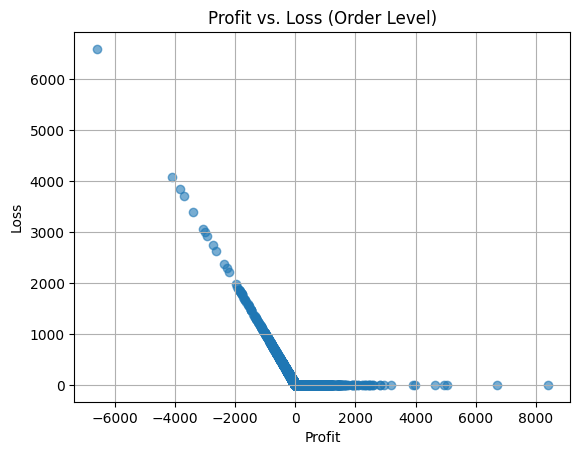

In [ ]:
plt.scatter(df["Profit"],df["loss"],alpha=0.6)
plt.xlabel("Profit")
plt.ylabel("Loss")
plt.title("Profit vs. Loss (Order Level)")
plt.grid(True)
plt.show()


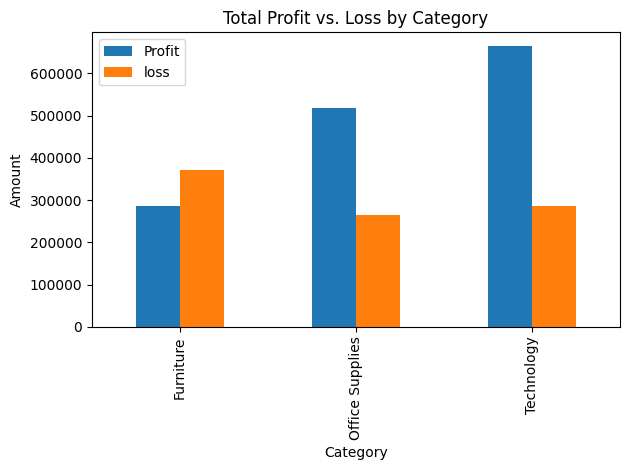

In [95]:
agg=df.groupby("Category")[["Profit", "loss"]].sum()
agg.plot(kind='bar')
plt.title("Total Profit vs. Loss by Category")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()


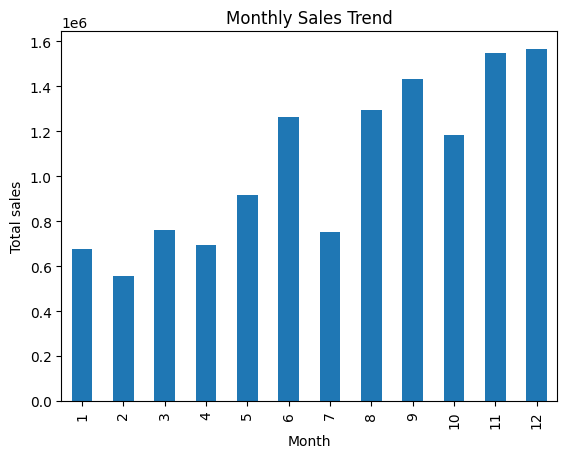

In [108]:
df['order_month']=df['Order Date'].dt.month
month_sales=df.groupby('order_month')['Sales'].sum()
monthly_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.title('Monthly Sales Trend')
plt.show()